# Import Library

In [ ]:
import numpy as np
print("numpy ver." + np.__version__)
import pandas as pd
print("pandas ver." + pd.__version__)

numpy ver.1.21.5
pandas ver.1.3.5


# Object Creation

## Creating Series
- by passing a list of values, letting pandas create a default integer index

In [ ]:
s = pd.Series([1,3,5,np.nan, 6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


## Creation DataFrame
- by passing a NumPy array, with a datetime index and labeled columns

In [ ]:
dates = pd.date_range("20130101", periods=6)
print(dates)
print()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

                   A         B         C         D
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-04 -0.450437  0.501915  1.003776  0.691249
2013-01-05  1.633764  0.324234 -1.707570  1.163615
2013-01-06  0.282402 -0.922663 -1.641314  0.505433


- by passing a dictionary of objects that can be converted into a series-like structure

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
print(df2)
print()
print("dtypes:")
print(df2.dtypes)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

dtypes:
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [ ]:
# IPython
# df2.<TAB>

# Viewing Data

## Basic Structure

In [ ]:
print("Head 5:\n", df.head())
print()
print("Tail 5:\n", df.tail())

Head 5:
                    A         B         C         D
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-04 -0.450437  0.501915  1.003776  0.691249
2013-01-05  1.633764  0.324234 -1.707570  1.163615

Tail 5:
                    A         B         C         D
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-04 -0.450437  0.501915  1.003776  0.691249
2013-01-05  1.633764  0.324234 -1.707570  1.163615
2013-01-06  0.282402 -0.922663 -1.641314  0.505433


In [ ]:
print("Index :\n", df.index)
print("Columns:\n", df.columns)

Index :
 DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Columns:
 Index(['A', 'B', 'C', 'D'], dtype='object')


## DataFrame to NumPy array
- This can be an expensive operation when your DataFrame has columns with different data types:
  + **NumPy arrays have one dtype for the entire array.**
  + **Pandas DataFrames have one dtype per column.**

- With heterogeneous data, the lowest common type will have to be used.

- For a mix of numeric and non-numeric types, the output array will have object dtype.

In [ ]:
df.values

array([[-0.81889557, -0.40918379,  0.08744721, -0.93588677],
       [ 0.68154262, -1.39097644,  2.01310478,  0.64446846],
       [ 1.01791104,  0.03322364, -0.1039122 ,  0.63445887],
       [-0.45043711,  0.50191541,  1.00377617,  0.69124864],
       [ 1.633764  ,  0.32423439, -1.70757042,  1.16361464],
       [ 0.28240247, -0.92266305, -1.64131359,  0.50543323]])

In [ ]:
# For df, our DataFrame of all floating-point values,
# DataFrame.to_numpy() is fast and doesn't require copying data:
df.to_numpy()

array([[-0.81889557, -0.40918379,  0.08744721, -0.93588677],
       [ 0.68154262, -1.39097644,  2.01310478,  0.64446846],
       [ 1.01791104,  0.03322364, -0.1039122 ,  0.63445887],
       [-0.45043711,  0.50191541,  1.00377617,  0.69124864],
       [ 1.633764  ,  0.32423439, -1.70757042,  1.16361464],
       [ 0.28240247, -0.92266305, -1.64131359,  0.50543323]])

In [ ]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [ ]:
# For df2, the DataFrame with multiple dtypes,
# DataFrame.to_numpy() is relatively expensive:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## Describe, Transpose, Sort

In [ ]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.391048 -0.310575 -0.058078  0.450556
std    0.917121  0.739319  1.460690  0.715967
min   -0.818896 -1.390976 -1.707570 -0.935887
25%   -0.267227 -0.794293 -1.256963  0.537690
50%    0.481973 -0.187980 -0.008232  0.639464
75%    0.933819  0.251482  0.774694  0.679554
max    1.633764  0.501915  2.013105  1.163615


In [ ]:
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.818896    0.681543    1.017911   -0.450437    1.633764    0.282402
B   -0.409184   -1.390976    0.033224    0.501915    0.324234   -0.922663
C    0.087447    2.013105   -0.103912    1.003776   -1.707570   -1.641314
D   -0.935887    0.644468    0.634459    0.691249    1.163615    0.505433


In [ ]:
print("Sorted by axis 1:")
print(df.sort_index(axis=1, ascending=False))
print()
print("Sorted by values B:")
print(df.sort_values(by="B"))

Sorted by axis 1:
                   D         C         B         A
2013-01-01 -0.935887  0.087447 -0.409184 -0.818896
2013-01-02  0.644468  2.013105 -1.390976  0.681543
2013-01-03  0.634459 -0.103912  0.033224  1.017911
2013-01-04  0.691249  1.003776  0.501915 -0.450437
2013-01-05  1.163615 -1.707570  0.324234  1.633764
2013-01-06  0.505433 -1.641314 -0.922663  0.282402

Sorted by values B:
                   A         B         C         D
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-06  0.282402 -0.922663 -1.641314  0.505433
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-05  1.633764  0.324234 -1.707570  1.163615
2013-01-04 -0.450437  0.501915  1.003776  0.691249


# Selecting Data

## Getting

In [ ]:
print(df["A"])
# print(df.A)

2013-01-01   -0.818896
2013-01-02    0.681543
2013-01-03    1.017911
2013-01-04   -0.450437
2013-01-05    1.633764
2013-01-06    0.282402
Freq: D, Name: A, dtype: float64


In [ ]:
print(df[:3])
print(df["20130102":"20130104"])

                   A         B         C         D
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
                   A         B         C         D
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-04 -0.450437  0.501915  1.003776  0.691249


## Selection by Label

In [ ]:
print(df.loc[dates[0]])

A   -0.818896
B   -0.409184
C    0.087447
D   -0.935887
Name: 2013-01-01 00:00:00, dtype: float64


In [ ]:
print(df.loc["20130102":"20130104", ["A","B"]])

                   A         B
2013-01-02  0.681543 -1.390976
2013-01-03  1.017911  0.033224
2013-01-04 -0.450437  0.501915


In [ ]:
print(df.loc["20130102", ["A","B"]])

A    0.681543
B   -1.390976
Name: 2013-01-02 00:00:00, dtype: float64


In [ ]:
print(df.loc[dates[0], "A"])
print(df.at[dates[0],"A"]) # equivalent to the prior method

-0.818895566676464
-0.818895566676464


## Selection by Position

In [ ]:
print(df.iloc[3])

A   -0.450437
B    0.501915
C    1.003776
D    0.691249
Name: 2013-01-04 00:00:00, dtype: float64


In [ ]:
print(df.iloc[3:5, 0:2])

                   A         B
2013-01-04 -0.450437  0.501915
2013-01-05  1.633764  0.324234


In [ ]:
print(df.iloc[[1,2,5],[1,3]])

                   B         D
2013-01-02 -1.390976  0.644468
2013-01-03  0.033224  0.634459
2013-01-06 -0.922663  0.505433


In [ ]:
print(df.iloc[1:3,:])

                   A         B         C         D
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459


In [ ]:
print(df.iloc[:,1:3])

                   B         C
2013-01-01 -0.409184  0.087447
2013-01-02 -1.390976  2.013105
2013-01-03  0.033224 -0.103912
2013-01-04  0.501915  1.003776
2013-01-05  0.324234 -1.707570
2013-01-06 -0.922663 -1.641314


In [ ]:
print(df.iloc[1,1])
print(df.iat[1,1])  # equivalent to the prior method

-1.3909764417520816
-1.3909764417520816


## Boolean Indexing

In [ ]:
print(df[df["A"]>0])

                   A         B         C         D
2013-01-02  0.681543 -1.390976  2.013105  0.644468
2013-01-03  1.017911  0.033224 -0.103912  0.634459
2013-01-05  1.633764  0.324234 -1.707570  1.163615
2013-01-06  0.282402 -0.922663 -1.641314  0.505433


In [ ]:
print(df[df>0])

                   A         B         C         D
2013-01-01       NaN       NaN  0.087447       NaN
2013-01-02  0.681543       NaN  2.013105  0.644468
2013-01-03  1.017911  0.033224       NaN  0.634459
2013-01-04       NaN  0.501915  1.003776  0.691249
2013-01-05  1.633764  0.324234       NaN  1.163615
2013-01-06  0.282402       NaN       NaN  0.505433


In [ ]:
df2 = df.copy()
df2["E"] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
print()
print(df2[df2["E"].isin(["two", "four"])])

                   A         B         C         D      E
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887    one
2013-01-02  0.681543 -1.390976  2.013105  0.644468    one
2013-01-03  1.017911  0.033224 -0.103912  0.634459    two
2013-01-04 -0.450437  0.501915  1.003776  0.691249  three
2013-01-05  1.633764  0.324234 -1.707570  1.163615   four
2013-01-06  0.282402 -0.922663 -1.641314  0.505433  three

                   A         B         C         D     E
2013-01-03  1.017911  0.033224 -0.103912  0.634459   two
2013-01-05  1.633764  0.324234 -1.707570  1.163615  four


## Setting

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range("20130102",periods=6))
print(s1)
print()
df["F"] = s1
print(df)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

                   A         B         C         D    F
2013-01-01 -0.818896 -0.409184  0.087447 -0.935887  NaN
2013-01-02  0.681543 -1.390976  2.013105  0.644468  1.0
2013-01-03  1.017911  0.033224 -0.103912  0.634459  2.0
2013-01-04 -0.450437  0.501915  1.003776  0.691249  3.0
2013-01-05  1.633764  0.324234 -1.707570  1.163615  4.0
2013-01-06  0.282402 -0.922663 -1.641314  0.505433  5.0


In [ ]:
df.at[dates[0], "A"] = 0 # setting values by label
df.iat[0,1] = 0 # setting values by position
df.loc[:, "D"] = np.array([5] * len(df)) # setting by assigning with a NumPy array
print(df)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.087447  5  NaN
2013-01-02  0.681543 -1.390976  2.013105  5  1.0
2013-01-03  1.017911  0.033224 -0.103912  5  2.0
2013-01-04 -0.450437  0.501915  1.003776  5  3.0
2013-01-05  1.633764  0.324234 -1.707570  5  4.0
2013-01-06  0.282402 -0.922663 -1.641314  5  5.0


In [ ]:
df2 = df.copy()
df2[df2>0] = -df2 # setting values by boolean
print(df2)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.087447 -5  NaN
2013-01-02 -0.681543 -1.390976 -2.013105 -5 -1.0
2013-01-03 -1.017911 -0.033224 -0.103912 -5 -2.0
2013-01-04 -0.450437 -0.501915 -1.003776 -5 -3.0
2013-01-05 -1.633764 -0.324234 -1.707570 -5 -4.0
2013-01-06 -0.282402 -0.922663 -1.641314 -5 -5.0


# Missing Data

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.087447  5  NaN  1.0
2013-01-02  0.681543 -1.390976  2.013105  5  1.0  1.0
2013-01-03  1.017911  0.033224 -0.103912  5  2.0  NaN
2013-01-04 -0.450437  0.501915  1.003776  5  3.0  NaN


In [ ]:
print(df1.dropna(how="any")) # how="any" (default) : where any NA values are present
print()
print(df1.dropna(how="all")) # how="all" : where all values are NA

                   A         B         C  D    F    E
2013-01-02  0.681543 -1.390976  2.013105  5  1.0  1.0

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.087447  5  NaN  1.0
2013-01-02  0.681543 -1.390976  2.013105  5  1.0  1.0
2013-01-03  1.017911  0.033224 -0.103912  5  2.0  NaN
2013-01-04 -0.450437  0.501915  1.003776  5  3.0  NaN


In [ ]:
print(pd.isna(df1))
print()
print(df1.fillna(value=5))

                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.087447  5  5.0  1.0
2013-01-02  0.681543 -1.390976  2.013105  5  1.0  1.0
2013-01-03  1.017911  0.033224 -0.103912  5  2.0  5.0
2013-01-04 -0.450437  0.501915  1.003776  5  3.0  5.0


# Operations

## Stats

In [ ]:
print("axis 0 :")
print(df.mean())
print()
print("axis 1 :")
print(df.mean(1))

axis 0 :
A    0.527531
B   -0.242378
C   -0.058078
D    5.000000
F    3.000000
dtype: float64

axis 1 :
2013-01-01    1.271862
2013-01-02    1.460734
2013-01-03    1.589444
2013-01-04    1.811051
2013-01-05    1.850086
2013-01-06    1.543685
Freq: D, dtype: float64


In [ ]:
print(df)
print()
s = pd.Series([1, 3, 4, np.nan, 6, 8], index=dates).shift(2)
print(s)
print()
print(df.sub(s, axis=0)) # equivalent to (dataframe - other)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.087447  5  NaN
2013-01-02  0.681543 -1.390976  2.013105  5  1.0
2013-01-03  1.017911  0.033224 -0.103912  5  2.0
2013-01-04 -0.450437  0.501915  1.003776  5  3.0
2013-01-05  1.633764  0.324234 -1.707570  5  4.0
2013-01-06  0.282402 -0.922663 -1.641314  5  5.0

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64

                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03  0.017911 -0.966776 -1.103912  4.0  1.0
2013-01-04 -3.450437 -2.498085 -1.996224  2.0  0.0
2013-01-05 -2.366236 -3.675766 -5.707570  1.0  0.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


## Apply

In [ ]:
print(df.apply(np.cumsum))

                   A         B         C   D     F
2013-01-01  0.000000  0.000000  0.087447   5   NaN
2013-01-02  0.681543 -1.390976  2.100552  10   1.0
2013-01-03  1.699454 -1.357753  1.996640  15   3.0
2013-01-04  1.249017 -0.855837  3.000416  20   6.0
2013-01-05  2.882781 -0.531603  1.292846  25  10.0
2013-01-06  3.165183 -1.454266 -0.348468  30  15.0


In [ ]:
print(df.apply(lambda x: x.max() - x.min()))

A    2.084201
B    1.892892
C    3.720675
D    0.000000
F    4.000000
dtype: float64


## Histogramming

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print()
print(s.value_counts())

0    1
1    6
2    5
3    1
4    1
5    3
6    2
7    1
8    1
9    6
dtype: int64

1    5
6    2
5    1
3    1
2    1
dtype: int64


## String Methods

In [ ]:
s = pd.Series(["A","Aaba", np.nan, "CABA", "cat"])
print(s.str.lower())
print()
print(s.str.upper())

0       a
1    aaba
2     NaN
3    caba
4     cat
dtype: object

0       A
1    AABA
2     NaN
3    CABA
4     CAT
dtype: object


# Merge

## Concat
- combining together Series and DataFrame objects

In [ ]:
df = pd.DataFrame(np.random.randn(10,4))
print(df)

          0         1         2         3
0 -0.146700  1.278642  1.837775  0.644873
1 -0.332040  1.597295 -0.681229 -1.238212
2  0.751823  1.117058 -0.453366  0.953989
3  0.074173 -1.043050  0.276312  0.926186
4 -0.090674  1.679349  2.130480  0.950658
5  0.483778 -0.330530  0.370747  0.569736
6 -0.603331  2.363939 -0.052191  0.186119
7 -2.002784 -1.237193 -1.876920 -0.876104
8  1.121755 -0.104830 -1.675228  1.250540
9  0.008456 -1.287063  0.070528 -0.642563


In [ ]:
pieces = [df[:3], df[3:7], df[7:]]
print(pieces)
print()
print(pd.concat(pieces)) # Concatenating objects together

[          0         1         2         3
0 -0.146700  1.278642  1.837775  0.644873
1 -0.332040  1.597295 -0.681229 -1.238212
2  0.751823  1.117058 -0.453366  0.953989,           0         1         2         3
3  0.074173 -1.043050  0.276312  0.926186
4 -0.090674  1.679349  2.130480  0.950658
5  0.483778 -0.330530  0.370747  0.569736
6 -0.603331  2.363939 -0.052191  0.186119,           0         1         2         3
7 -2.002784 -1.237193 -1.876920 -0.876104
8  1.121755 -0.104830 -1.675228  1.250540
9  0.008456 -1.287063  0.070528 -0.642563]

          0         1         2         3
0 -0.146700  1.278642  1.837775  0.644873
1 -0.332040  1.597295 -0.681229 -1.238212
2  0.751823  1.117058 -0.453366  0.953989
3  0.074173 -1.043050  0.276312  0.926186
4 -0.090674  1.679349  2.130480  0.950658
5  0.483778 -0.330530  0.370747  0.569736
6 -0.603331  2.363939 -0.052191  0.186119
7 -2.002784 -1.237193 -1.876920 -0.876104
8  1.121755 -0.104830 -1.675228  1.250540
9  0.008456 -1.287063  0.0705

## Join
- SQL style merging

In [ ]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1, 2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval':[4, 5]})
print(left)
print()
print(right)
print()
print(pd.merge(left, right, on='key'))

   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [ ]:
left = pd.DataFrame({'key':['foo', 'bar'], 'lval':[1, 2]})
right = pd.DataFrame({'key':['foo', 'bar'], 'rval':[4, 5]})
print(left)
print()
print(right)
print()
print(pd.merge(left, right, on='key'))

   key  lval
0  foo     1
1  bar     2

   key  rval
0  foo     4
1  bar     5

   key  lval  rval
0  foo     1     4
1  bar     2     5


## Append

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
0  0.120201 -0.286267 -0.205740  1.107503
1 -0.818479 -0.059564  0.192151  1.920259
2  0.687467 -0.833330 -0.426913  0.852926
3 -1.103335  0.213012  1.003000 -0.648385
4 -0.576006  1.414470  0.851227 -0.277232
5  0.189853  0.311170 -0.448372 -0.201059
6  1.707547  0.099129 -1.332999  0.478148
7  1.153861  1.831233  0.125928 -1.330353


In [ ]:
s = df.iloc[3]
print(df.append(s, ignore_index=True))

          A         B         C         D
0  0.120201 -0.286267 -0.205740  1.107503
1 -0.818479 -0.059564  0.192151  1.920259
2  0.687467 -0.833330 -0.426913  0.852926
3 -1.103335  0.213012  1.003000 -0.648385
4 -0.576006  1.414470  0.851227 -0.277232
5  0.189853  0.311170 -0.448372 -0.201059
6  1.707547  0.099129 -1.332999  0.478148
7  1.153861  1.831233  0.125928 -1.330353
8 -1.103335  0.213012  1.003000 -0.648385


# Grouping
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

     A      B         C         D
0  foo    one  0.031321 -0.238988
1  bar    one -0.626332 -0.445851
2  foo    two -1.448981  1.262838
3  bar  three -0.424664 -0.639157
4  foo    two  1.547849  2.378992
5  bar    two -0.351304 -0.521492
6  foo    one -1.903777  1.998802
7  foo  three -0.613947 -0.422391


In [ ]:
print(df.groupby("A").sum())

            C         D
A                      
bar -1.402300 -1.606500
foo -2.387536  4.979252


In [ ]:
print(df.groupby(["A","B"]).sum())

                  C         D
A   B                        
bar one   -0.626332 -0.445851
    three -0.424664 -0.639157
    two   -0.351304 -0.521492
foo one   -1.872457  1.759814
    three -0.613947 -0.422391
    two    0.098868  3.641830


In [ ]:
df_min = df.groupby(["A","B"])["C"].min()
df_max = df.groupby(["A","B"])["C"].max()

print(pd.merge(df_min, df_max, on=['A',"B"], suffixes=('_min', '_max')))

              C_min     C_max
A   B                        
bar one   -0.626332 -0.626332
    three -0.424664 -0.424664
    two   -0.351304 -0.351304
foo one   -1.903777  0.031321
    three -0.613947 -0.613947
    two   -1.448981  1.547849


# Reshaping

## Stack
- stack() : Compress a level in the DataFrame's columns:

In [ ]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["idx_1", "idx_2"])
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=["A","B"])
df2 = df[:4]

print(df2)

                    A         B
idx_1 idx_2                    
bar   one   -0.748802  0.560048
      two   -0.214015 -0.658540
baz   one   -1.968829 -0.806776
      two   -1.314742 -0.174498


In [ ]:
stacked = df2.stack()
print(stacked) # level: idx_1 > idx_2 > columns

idx_1  idx_2   
bar    one    A   -0.748802
              B    0.560048
       two    A   -0.214015
              B   -0.658540
baz    one    A   -1.968829
              B   -0.806776
       two    A   -1.314742
              B   -0.174498
dtype: float64


- unstack() : the inverse operation of stack()

In [ ]:
print(stacked.unstack()) # columns(last level) / default -1
print()
print(stacked.unstack(0)) # idx_1 
print()
print(stacked.unstack(1)) # idx_2

                    A         B
idx_1 idx_2                    
bar   one   -0.748802  0.560048
      two   -0.214015 -0.658540
baz   one   -1.968829 -0.806776
      two   -1.314742 -0.174498

idx_1         bar       baz
idx_2                      
one   A -0.748802 -1.968829
      B  0.560048 -0.806776
two   A -0.214015 -1.314742
      B -0.658540 -0.174498

idx_2         one       two
idx_1                      
bar   A -0.748802 -0.214015
      B  0.560048 -0.658540
baz   A -1.968829 -1.314742
      B -0.806776 -0.174498


## Pivot Table

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["aa", "bb", "cc"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
print(df)

        A   B    C         D         E
0     one  aa  foo  1.055556 -0.342298
1     one  bb  foo -0.463657 -0.004332
2     two  cc  foo  0.953746  0.690613
3   three  aa  bar -0.980697  0.498251
4     one  bb  bar -0.352120 -0.503475
5     one  cc  bar  0.298470 -1.316212
6     two  aa  foo  0.580929  0.483970
7   three  bb  foo  0.391527  0.200354
8     one  cc  foo -1.314898 -1.183403
9     one  aa  bar -0.058855 -0.004713
10    two  bb  bar -0.253133  1.255313
11  three  cc  bar  0.882602  0.561369


In [ ]:
print(pd.pivot_table(df, values="D", index=["A","B"], columns="C"))

C              bar       foo
A     B                     
one   aa -0.058855  1.055556
      bb -0.352120 -0.463657
      cc  0.298470 -1.314898
three aa -0.980697       NaN
      bb       NaN  0.391527
      cc  0.882602       NaN
two   aa       NaN  0.580929
      bb -0.253133       NaN
      cc       NaN  0.953746


# Time Series

In [ ]:
rng = pd.date_range("1/1/2022", periods=100, freq="S") # secondly frequency
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
print(ts.resample("5Min").first())
print(ts.resample("5Min").last())
print(ts.resample("5Min").sum())

2022-01-01    192
Freq: 5T, dtype: int64
2022-01-01    304
Freq: 5T, dtype: int64
2022-01-01    26586
Freq: 5T, dtype: int64


In [ ]:
rng = pd.date_range("3/6/2021 00:00", periods=5, freq="D") # daily frequency
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)

2021-03-06   -1.465806
2021-03-07    0.938092
2021-03-08    2.811226
2021-03-09   -0.186533
2021-03-10   -1.048929
Freq: D, dtype: float64


In [ ]:
ts_utc = ts.tz_localize("UTC") # UTC timezone
print("UTC :")
print(ts_utc)
print("\nUS/Eastern :")
print(ts_utc.tz_convert("US/Eastern")) # US/Eastern timezone

UTC :
2021-03-06 00:00:00+00:00   -1.465806
2021-03-07 00:00:00+00:00    0.938092
2021-03-08 00:00:00+00:00    2.811226
2021-03-09 00:00:00+00:00   -0.186533
2021-03-10 00:00:00+00:00   -1.048929
Freq: D, dtype: float64

US/Eastern :
2021-03-05 19:00:00-05:00   -1.465806
2021-03-06 19:00:00-05:00    0.938092
2021-03-07 19:00:00-05:00    2.811226
2021-03-08 19:00:00-05:00   -0.186533
2021-03-09 19:00:00-05:00   -1.048929
Freq: D, dtype: float64


In [ ]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts) # DatetimeIndex
print()
ps = ts.to_period()
print(ps) # PeriodIndex
print()
print(ps.to_timestamp())

2022-01-31    0.438135
2022-02-28   -0.052516
2022-03-31   -1.491175
2022-04-30    0.708521
2022-05-31   -1.794057
Freq: M, dtype: float64
DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31'],
              dtype='datetime64[ns]', freq='M')

2022-01    0.438135
2022-02   -0.052516
2022-03   -1.491175
2022-04    0.708521
2022-05   -1.794057
Freq: M, dtype: float64
PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05'], dtype='period[M]')

2022-01-01    0.438135
2022-02-01   -0.052516
2022-03-01   -1.491175
2022-04-01    0.708521
2022-05-01   -1.794057
Freq: MS, dtype: float64


In [ ]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV") # quarterly frequency
ts = pd.Series(np.random.randn(len(prng)), prng)
print(ts.head())
print()

# month end & hour start
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
print(ts.head())

1990Q1    1.479314
1990Q2    0.799696
1990Q3    0.148978
1990Q4   -0.571086
1991Q1    1.908509
Freq: Q-NOV, dtype: float64

1990-03-01 09:00    1.479314
1990-06-01 09:00    0.799696
1990-09-01 09:00    0.148978
1990-12-01 09:00   -0.571086
1991-03-01 09:00    1.908509
Freq: H, dtype: float64


# Categoricals

In [ ]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
print(df)

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e


In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"].cat.categories = ["very good", "good", "very bad"] # rename categories
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad","medium","good","very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
print(df.sort_values(by="grade").reset_index(drop=True))

   id raw_grade      grade
0   6         e   very bad
1   2         b       good
2   3         b       good
3   1         a  very good
4   4         a  very good
5   5         a  very good


In [ ]:
print(df.groupby("grade").size())

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


# Plotting

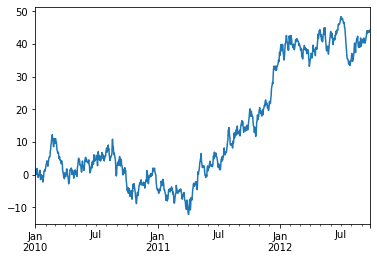

In [ ]:
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2010", periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

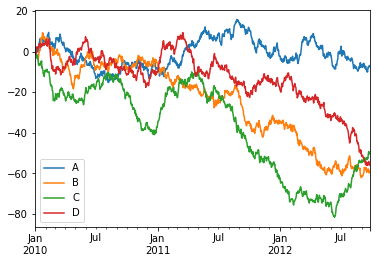

In [ ]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"])
df = df.cumsum()
df.plot()
plt.legend(loc='best')
plt.show()

# Getting data in/out

## CSV

In [ ]:
df.to_csv("foo.csv")

In [ ]:
print(pd.read_csv("foo.csv"))

     Unnamed: 0         A          B          C          D
0    2010-01-01  0.015846   0.025822   0.443290  -0.724835
1    2010-01-02 -0.084776   0.330946  -0.669265  -0.949676
2    2010-01-03  1.325583  -0.697926  -0.204375  -1.145391
3    2010-01-04  2.293831  -2.097458  -1.260249  -0.555542
4    2010-01-05  1.334001  -2.392123  -2.659330  -0.325232
..          ...       ...        ...        ...        ...
995  2012-09-22 -7.868011 -59.520981 -49.220218 -54.072522
996  2012-09-23 -7.288884 -59.584693 -49.307716 -54.783148
997  2012-09-24 -6.835061 -59.508180 -49.608991 -55.780242
998  2012-09-25 -6.863802 -58.711503 -50.458917 -55.218363
999  2012-09-26 -7.075728 -59.524064 -49.924592 -55.653215

[1000 rows x 5 columns]


## HDF5

In [ ]:
df.to_hdf("foo.h5", "df")

In [ ]:
print(pd.read_hdf("foo.h5", "df"))

                   A          B          C          D
2010-01-01  0.015846   0.025822   0.443290  -0.724835
2010-01-02 -0.084776   0.330946  -0.669265  -0.949676
2010-01-03  1.325583  -0.697926  -0.204375  -1.145391
2010-01-04  2.293831  -2.097458  -1.260249  -0.555542
2010-01-05  1.334001  -2.392123  -2.659330  -0.325232
...              ...        ...        ...        ...
2012-09-22 -7.868011 -59.520981 -49.220218 -54.072522
2012-09-23 -7.288884 -59.584693 -49.307716 -54.783148
2012-09-24 -6.835061 -59.508180 -49.608991 -55.780242
2012-09-25 -6.863802 -58.711503 -50.458917 -55.218363
2012-09-26 -7.075728 -59.524064 -49.924592 -55.653215

[1000 rows x 4 columns]


## Excel

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
print(pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"]))

    Unnamed: 0         A          B          C          D
0   2010-01-01  0.015846   0.025822   0.443290  -0.724835
1   2010-01-02 -0.084776   0.330946  -0.669265  -0.949676
2   2010-01-03  1.325583  -0.697926  -0.204375  -1.145391
3   2010-01-04  2.293831  -2.097458  -1.260249  -0.555542
4   2010-01-05  1.334001  -2.392123  -2.659330  -0.325232
..         ...       ...        ...        ...        ...
995 2012-09-22 -7.868011 -59.520981 -49.220218 -54.072522
996 2012-09-23 -7.288884 -59.584693 -49.307716 -54.783148
997 2012-09-24 -6.835061 -59.508180 -49.608991 -55.780242
998 2012-09-25 -6.863802 -58.711503 -50.458917 -55.218363
999 2012-09-26 -7.075728 -59.524064 -49.924592 -55.653215

[1000 rows x 5 columns]
